# Final Project

Taylor Poole

CDS 411

---

In [2]:
# Standard imports for CDS 411 projects
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# One-time install and activation of improved PDF
# export template
import template_install

/Users/taylorpoole/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Analysis of the problem

In today’s machine learning world, there are many applications to use machine learning to create a better society. One of these ways is by using data-driven approaches to find strategies for better crime and safety prevention. The following simulation will answer the question: Can one predict if a crime will be nonviolent or violent given a specific neighborhood in Washington, DC? Then a separate simulation will see if a prediction of violent or nonviolent crime will occur based on crime method. 

Background information shows that police tend to rely on reactive strategies while on duty. This type of strategy is more expensive and allows for more crimes to be committed. Using data-driven prediction models allows for police to be better equipped with knowledge of known “hotspots” to be more proactive and use law enforcement in a more cost effective manner. 


## Model design and solution

The data gathered for this model was retrieved from http://opendata.dc.gov/datasets/ for the following five data sets:

crime-incidents-in-2013

crime-incidents-in-2014

crime-incidents-in-2015

crime-incidents-in-2016

crime-incidents-in-2017

Before the data was imported into the Jupiter dataset, it was joined in another software, R. The resulting file was named fiveyearcrime1.csv.


Import the data set into python and label 'crime':

In [3]:
filename = '/Users/taylorpoole/Documents/FALL 2018/CDS411/final-project-tpoole4/fiveyearcrime1.csv'
crime = pd.read_csv(filename)

Now that the data is labeled as crime, I can view the dataset(Here just displays the first five rows):

In [4]:
crime.head()

,Unnamed: 0,X,Y,REPORT_DAT,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,YEAR,MONTH,DAY,CLUSTER
0,1,-77.012183,38.871394,4/16/13 0:00,MIDNIGHT,KNIFE,HOMICIDE,1.0,Cluster 9,Precinct 127,2013,4,16,9.0
1,2,-77.054969,38.899776,2/27/13 0:00,MIDNIGHT,OTHERS,SEX ABUSE,2.0,Cluster 5,Precinct 3,2013,2,27,5.0
2,3,-76.996185,38.927922,7/31/13 0:00,MIDNIGHT,OTHERS,HOMICIDE,5.0,Cluster 21,Precinct 74,2013,7,31,21.0
3,4,-76.943078,38.883686,1/31/13 0:00,MIDNIGHT,GUN,HOMICIDE,6.0,Cluster 33,Precinct 103,2013,1,31,33.0
4,5,-76.939209,38.892278,7/8/13 0:00,MIDNIGHT,OTHERS,SEX ABUSE,6.0,Cluster 33,Precinct 99,2013,7,8,33.0


DATAPREPROCESSING:

Since I am going to use a Logistic Regression I will add a column that has a true/false answer to whether or not the crime is violent. True will be represented as '1' and False will be represented as '0'.

In [5]:
#The function query is used from pandas, to gather the violent crimes from the dataset crime.
#Violent Crimes= HOMOCIDE, ASSAULT W/DANGEROUS WEAPON, SEX ABUSE
DC_HOMICIDE=crime.query('OFFENSE=="HOMICIDE"')
DC_ASSAULT = crime.query('OFFENSE == "ASSAULT W/DANGEROUS WEAPON"')
DC_ABUSE = crime.query('OFFENSE == "SEX ABUSE"')

In [6]:
#After using the query function, data is joined by the append function to a new dataframe labeled, 'VIOLENT_crime'
VIOLENT_crime = DC_HOMICIDE.append(DC_ASSAULT).append(DC_ABUSE)

In [7]:
#A new column is added to the violent crime dataframe, labeled CRIMETYPE and all values are given a 1.
#resulting dataframe is labeled, 'v'
v=VIOLENT_crime.assign(CRIMETYPE=int(1))

In [8]:
#View first five rows of dataframe v
v.head()

,Unnamed: 0,X,Y,REPORT_DAT,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,YEAR,MONTH,DAY,CLUSTER,CRIMETYPE
0,1,-77.012183,38.871394,4/16/13 0:00,MIDNIGHT,KNIFE,HOMICIDE,1.0,Cluster 9,Precinct 127,2013,4,16,9.0,1
2,3,-76.996185,38.927922,7/31/13 0:00,MIDNIGHT,OTHERS,HOMICIDE,5.0,Cluster 21,Precinct 74,2013,7,31,21.0,1
3,4,-76.943078,38.883686,1/31/13 0:00,MIDNIGHT,GUN,HOMICIDE,6.0,Cluster 33,Precinct 103,2013,1,31,33.0,1
550,551,-76.965840,38.860318,1/10/13 0:00,MIDNIGHT,KNIFE,HOMICIDE,6.0,Cluster 35,Precinct 113,2013,1,10,35.0,1
841,842,-77.019905,38.960170,1/25/13 0:00,MIDNIGHT,GUN,HOMICIDE,4.0,Cluster 17,Precinct 58,2013,1,25,17.0,1


In [9]:
#The function query is used from pandas, to gather the nonviolent crimes from the dataset crime.
#NonViolent Crimes= BURGLARY, MOTOR VEHICLE THEFT, ROBBERY, THEFT F/AUTO, THEFT /OTHER
DC_BURGLARY=crime.query('OFFENSE=="BURGLARY"')
DC_MOTOR = crime.query('OFFENSE == "MOTOR VEHICLE THEFT"')
DC_ROBBERY = crime.query('OFFENSE == "ROBBERY"')
DC_THEFTAU = crime.query('OFFENSE == "THEFT F/AUTO"')
DC_THEFTOTH = crime.query('OFFENSE == "THEFT /OTHER"')

In [10]:
#After using the query function, data is joined by the append function to a new dataframe labeled, 'NONVIOLENT_crime'
NONVIOLENT_crime = DC_BURGLARY.append(DC_MOTOR).append(DC_ROBBERY).append(DC_THEFTAU).append(DC_THEFTOTH)

In [11]:
#A new column is added to the nonviolent crime dataframe, labeled CRIMETYPE and all values are given a 0.
#resulting dataframe is labeled, 'nv'
nv=NONVIOLENT_crime.assign(CRIMETYPE=int(0))

In [12]:
#Both dataframes 'n' and 'nv' are joined together to make dataframe 'DC_CRIME'
DC_CRIME=v.append(nv)

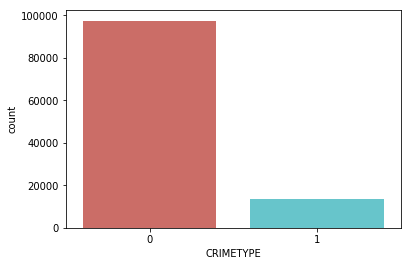

In [13]:
#Plot CRIMETYPE in a count plot to be sure there are only two types of output (1 and 0)
sns.countplot(x='CRIMETYPE',data=DC_CRIME, palette='hls')

In [14]:
#DC_CRIME.isnull().sum()

In [15]:
#Shows how many records are in the dataset and what variables are available.
DC_CRIME.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111084 entries, 0 to 181820
Data columns (total 15 columns):
Unnamed: 0              111084 non-null int64
X                       111084 non-null float64
Y                       111084 non-null float64
REPORT_DAT              111084 non-null object
SHIFT                   111084 non-null object
METHOD                  111084 non-null object
OFFENSE                 111084 non-null object
DISTRICT                111004 non-null float64
NEIGHBORHOOD_CLUSTER    109860 non-null object
VOTING_PRECINCT         111057 non-null object
YEAR                    111084 non-null int64
MONTH                   111084 non-null int64
DAY                     111084 non-null int64
CLUSTER                 109860 non-null float64
CRIMETYPE               111084 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 18.6+ MB


In [16]:
#Looks at the first five rows of DC_CRIME.
DC_CRIME.head()

,Unnamed: 0,X,Y,REPORT_DAT,SHIFT,METHOD,OFFENSE,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,YEAR,MONTH,DAY,CLUSTER,CRIMETYPE
0,1,-77.012183,38.871394,4/16/13 0:00,MIDNIGHT,KNIFE,HOMICIDE,1.0,Cluster 9,Precinct 127,2013,4,16,9.0,1
2,3,-76.996185,38.927922,7/31/13 0:00,MIDNIGHT,OTHERS,HOMICIDE,5.0,Cluster 21,Precinct 74,2013,7,31,21.0,1
3,4,-76.943078,38.883686,1/31/13 0:00,MIDNIGHT,GUN,HOMICIDE,6.0,Cluster 33,Precinct 103,2013,1,31,33.0,1
550,551,-76.965840,38.860318,1/10/13 0:00,MIDNIGHT,KNIFE,HOMICIDE,6.0,Cluster 35,Precinct 113,2013,1,10,35.0,1
841,842,-77.019905,38.960170,1/25/13 0:00,MIDNIGHT,GUN,HOMICIDE,4.0,Cluster 17,Precinct 58,2013,1,25,17.0,1


In [17]:
#Changes categorical variables to indicators, known as dummy indicators.
method = pd.get_dummies(DC_CRIME['METHOD'])
method.head()

,GUN,KNIFE,OTHERS
0,0,1,0
2,0,0,1
3,1,0,0
550,0,1,0
841,1,0,0


In [18]:
#Changes categorical variables to indicators, known as dummy indicators.
shift = pd.get_dummies(DC_CRIME['SHIFT'])
shift.head()

,DAY,EVENING,MIDNIGHT
0,0,0,1
2,0,0,1
3,0,0,1
550,0,0,1
841,0,0,1


In [19]:
#Drops the categorical variable columns from above and two other columns completely.
DC_CRIME.drop(['SHIFT', 'METHOD', 'REPORT_DAT', 'VOTING_PRECINCT'], axis = 1, inplace=True)
DC_CRIME.head()

,Unnamed: 0,X,Y,OFFENSE,DISTRICT,NEIGHBORHOOD_CLUSTER,YEAR,MONTH,DAY,CLUSTER,CRIMETYPE
0,1,-77.012183,38.871394,HOMICIDE,1.0,Cluster 9,2013,4,16,9.0,1
2,3,-76.996185,38.927922,HOMICIDE,5.0,Cluster 21,2013,7,31,21.0,1
3,4,-76.943078,38.883686,HOMICIDE,6.0,Cluster 33,2013,1,31,33.0,1
550,551,-76.965840,38.860318,HOMICIDE,6.0,Cluster 35,2013,1,10,35.0,1
841,842,-77.019905,38.960170,HOMICIDE,4.0,Cluster 17,2013,1,25,17.0,1


In [20]:
#Adds the dummy indicators to the dataset and renames the dataset 'DCcrime'.
DCcrime = pd.concat([DC_CRIME,shift,method],axis=1)
DCcrime.head()

,Unnamed: 0,X,Y,OFFENSE,DISTRICT,NEIGHBORHOOD_CLUSTER,YEAR,MONTH,DAY,CLUSTER,CRIMETYPE,DAY,EVENING,MIDNIGHT,GUN,KNIFE,OTHERS
0,1,-77.012183,38.871394,HOMICIDE,1.0,Cluster 9,2013,4,16,9.0,1,0,0,1,0,1,0
2,3,-76.996185,38.927922,HOMICIDE,5.0,Cluster 21,2013,7,31,21.0,1,0,0,1,0,0,1
3,4,-76.943078,38.883686,HOMICIDE,6.0,Cluster 33,2013,1,31,33.0,1,0,0,1,1,0,0
550,551,-76.965840,38.860318,HOMICIDE,6.0,Cluster 35,2013,1,10,35.0,1,0,0,1,0,1,0
841,842,-77.019905,38.960170,HOMICIDE,4.0,Cluster 17,2013,1,25,17.0,1,0,0,1,1,0,0


In [21]:
#Checks the variables again.
DCcrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111084 entries, 0 to 181820
Data columns (total 17 columns):
Unnamed: 0              111084 non-null int64
X                       111084 non-null float64
Y                       111084 non-null float64
OFFENSE                 111084 non-null object
DISTRICT                111004 non-null float64
NEIGHBORHOOD_CLUSTER    109860 non-null object
YEAR                    111084 non-null int64
MONTH                   111084 non-null int64
DAY                     111084 non-null int64
CLUSTER                 109860 non-null float64
CRIMETYPE               111084 non-null int64
DAY                     111084 non-null uint8
EVENING                 111084 non-null uint8
MIDNIGHT                111084 non-null uint8
GUN                     111084 non-null uint8
KNIFE                   111084 non-null uint8
OTHERS                  111084 non-null uint8
dtypes: float64(4), int64(5), object(2), uint8(6)
memory usage: 15.8+ MB


In [22]:
#Querys out NEIGHBORHOOD_CLUSTER 39 because has the highest count of violent crimes.
FIL_CLUS39 = DCcrime.query('NEIGHBORHOOD_CLUSTER == "Cluster 39"')

In [23]:
#Querys out all other neighborhood clusters EXCEPT for NEIGHBORHOOD_CLUSTER 39 39
oth_clus = DCcrime.query('NEIGHBORHOOD_CLUSTER != "Cluster 39"')

In [24]:
#Assigns a new column named 'NCLUSTER' and gives each row a value of 1 for NEIGHBORHOOD_CLUSTER 39
c39=FIL_CLUS39.assign(NCLUSTER=(1))

In [25]:
#Assigns a new column named 'NCLUSTER' and gives each row a value of 0, except for NEIGHBORHOOD_CLUSTER 39
n39=oth_clus.assign(NCLUSTER=(0))

In [26]:
#Joins c39 and n36 datasets.
FILTER_CLUS39=c39.append(n39)

In [27]:
#Confirms variables again for dataset FILTER_CLUS39.
FILTER_CLUS39.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111084 entries, 5041 to 181820
Data columns (total 18 columns):
Unnamed: 0              111084 non-null int64
X                       111084 non-null float64
Y                       111084 non-null float64
OFFENSE                 111084 non-null object
DISTRICT                111004 non-null float64
NEIGHBORHOOD_CLUSTER    109860 non-null object
YEAR                    111084 non-null int64
MONTH                   111084 non-null int64
DAY                     111084 non-null int64
CLUSTER                 109860 non-null float64
CRIMETYPE               111084 non-null int64
DAY                     111084 non-null uint8
EVENING                 111084 non-null uint8
MIDNIGHT                111084 non-null uint8
GUN                     111084 non-null uint8
KNIFE                   111084 non-null uint8
OTHERS                  111084 non-null uint8
NCLUSTER                111084 non-null int64
dtypes: float64(4), int64(6), object(2), uint8(6

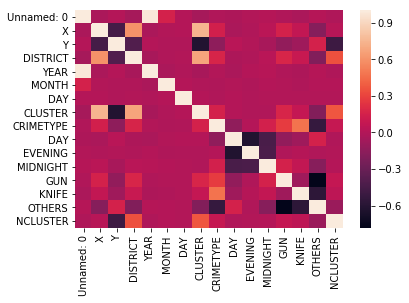

In [28]:
#Makes a heatmap to identify any correalations
sns.heatmap(FILTER_CLUS39.corr())

## Results and conclusions

For predictive data-driven models, you should present visualizations that help the reader to better understand 
the way the data is distributed in the dataset, i.e. perform a basic exploratory data analysis. 
Then when discussing the predictive model itself, your discussion and analysis should review the different scores 
you received for your model and then conclude which model seems to perform best. Statistical considerations, 
such as computing the standard error of the mean of cross-validated scores, should also be included.

In [29]:
#The first simulation run is to use 'NCLUSTER' as the feature.
feature_cols = [ 'NCLUSTER']

In [30]:
X=FILTER_CLUS39[feature_cols]
#Y=FILTER_CLUS39['CRIMETYPE'].reshape(1, -1)

In [31]:
#CRIMETYPE is placed as the target.
#X=FILTER_CLUS39[['NEIGHBORHOOD_CLUSTER']]
Y=pd.factorize(FILTER_CLUS39['CRIMETYPE'].values)[0].reshape(-1,1)

In [32]:
#Optional way to write the above two lines of code.
X=FILTER_CLUS39.iloc[:, 17].values
y=FILTER_CLUS39.iloc[:, 10].values

In [33]:
#Run the simulation

In [34]:

X_train,X_test,y_train,y_test=train_test_split(Y,X,test_size=0.15,random_state=5)



In [35]:
lr = LogisticRegression()

# fit the model with data
(lr.fit(X_train,y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred=lr.predict(X_test)

In [37]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15884,     0],
       [  779,     0]])

The above array shows that using a specific neighborhood cluster (cluster 39), the model was able to predict 15,884 correct predictions of CRIMETYPE and 779 incorrect predictions of CRIMETYPE.

Text(33,0.5,'Actual label')

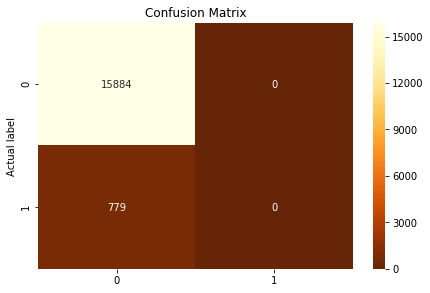

In [38]:
class_nms=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_nms))
plt.xticks(tick_marks, class_nms)
plt.yticks(tick_marks, class_nms)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrBr_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.0)
plt.ylabel('Actual label')

The accurracy of this model is over 95% however there is no precision and recall.

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9532497149372862
Precision: 0.0
Recall: 0.0


/Users/taylorpoole/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


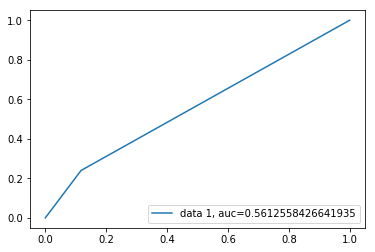

In [40]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:

feature_column=['OTHERS']
X=FILTER_CLUS39[feature_column]
Y=pd.factorize(FILTER_CLUS39['CRIMETYPE'].values)[0].reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(Y,X,test_size=0.25,random_state=0)
lr = LogisticRegression()

# fit the model with data
(lr.fit(X_train,y_train))

y_pred=lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/Users/taylorpoole/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2155,  1753],
       [ 1278, 22585]])

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8908573691980843
Precision: 0.9279727175610157
Recall: 0.9464442861333445


Text(33,0.5,'Actual label')

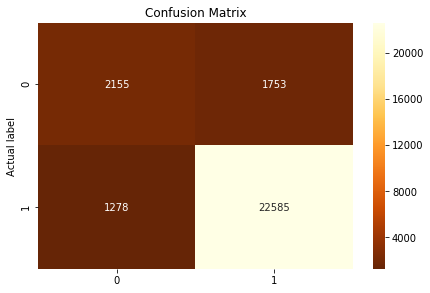

In [43]:
class_nms=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_nms))
plt.xticks(tick_marks, class_nms)
plt.yticks(tick_marks, class_nms)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrBr_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.0)
plt.ylabel('Actual label')

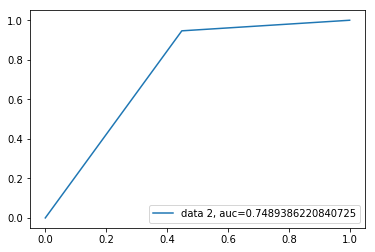

In [44]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Differring from the first model, the above model made a substansial amount of incorrect predictions when the method of 'OTHERS' was used as a feature and 'CRIMETYPE' as the target.

Future research: It would be interesting to look at auto crashes and see what kind of correlation emerges between crime and auto accidents. 

In [45]:
import Pandoc

ModuleNotFoundError: No module named 'Pandoc'

In [ ]:
brew install pandoc

In [55]:
feature_column=['OTHERS', 'GUN']
X=FILTER_CLUS39[feature_column]
Y=FILTER_CLUS39[['CRIMETYPE']]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
lr = LogisticRegression()

# fit the model with data
(lr.fit(X_train,y_train))

y_pred=lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/Users/taylorpoole/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[24081,   257],
       [ 2316,  1117]])

In [54]:
train_test_split?